# Applied Math 10: Computing for Science and Engineering

## Lab 11 : Data Fitting

**Spring 2020**<br/>
**Lab Instructors**: CEE group and G. Neofotistos<br>
**Material preparation**: Eleni Kaxiras

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1. Fitting our first set of data points

![](linear.png)

- Let's import the set of (x, y) points by loading the following two data files: `data/AM10_L06_1_x.txt` and `data/AM10_L06_1_y.txt` in variables `x_1` and `y_1` respectively.
- Check to see if what you see is what you get! That is, check the type and length of the variables you just loaded. Save the array dimension in a variable named `Nd` for later use.
- Lastly let's plot the two arrays. 

**Discussion**: Describe what you see in terms of the shape of the data.

In [2]:
# Load the data 
x_1=np.loadtxt('AM10_L11_1_x.txt')
y_1=np.loadtxt('AM10_L11_1_y.txt')

In [3]:
len(x_1), len(y_1)

(50, 50)

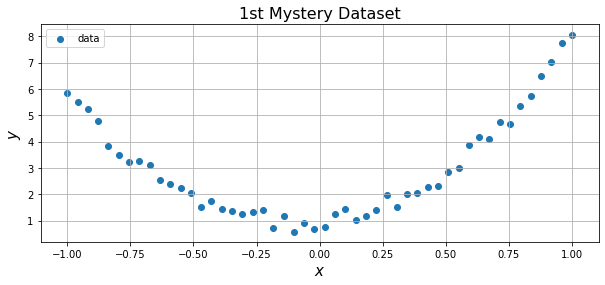

In [4]:
# Plot the data
fonts = 15
fig = plt.figure(figsize=(10,4))
plt.xlabel(r'$x$', fontsize=fonts)
plt.ylabel(r'$y$', fontsize=fonts)
plt.title(f'1st Mystery Dataset', fontsize=fonts+1)
plt.scatter(x_1, y_1, label='data');
plt.grid();
plt.legend();
plt.show();

### Let's Fit a Polynomial

It does not seem that we can fit this set of points with a line. So let's try a second degree polynomial, which, as we know, is described by the formula:<BR><BR>
$$ {\rm P(x)} = a\cdot{x^2}+b\cdot{x}+c
$$ 
<br>
#### Let's define a 2nd degree polynomial

In [6]:
# your code here
def poly2(x, a, b, c):
    return (a * (x**2)) + (b * x) + c

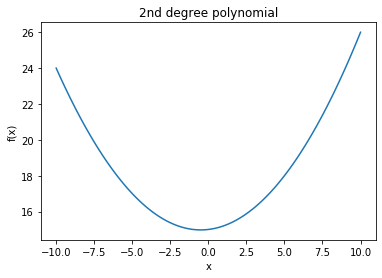

In [7]:
# Let's try it out
x = np.linspace(-10,10, 100)
a, b, c = 0.1, 0.1, 15.
y = poly2(x, a, b, c)
plt.title('2nd degree polynomial')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

>**EXERCISE 1**: 
Plot a 4th degree polynomial

In [8]:
# your code here
def poly4(x, a, b, c, d, e):
    return (a * (x**4)) + (b * (x**3)) + (c * (x**2)) + (d * x) + e

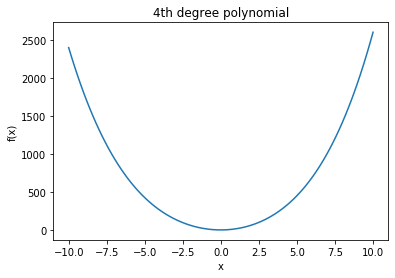

In [9]:
# %load solutions/exercise1.py
# Let's try it out
x = np.linspace(-10,10, 100)
a, b, c, d, e = 0.1, 0.1, 15., 0.1, 0.1 
y = poly4(x, a, b, c, d, e)
plt.title('4th degree polynomial')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

### Now, for the actual fitting!

We will use `scipy`'s `curve_fit` which uses the method of Least Squares to minimize the error in the fit. You have seen this code in lecture. We will convert it into a function for ease of use.

In [11]:
def fit_and_plot_func(func, x, y, title):
    """
       Fit and plot a polynomial. 
       Arguments: poly function, x data, y data
       Returns: the plot of the fit
        """
    
    # first find the coefficients (that is, find the optimal values of the coefficients that yield the best fit)
    popt, pcov = curve_fit(func, x, y) # in scipy module
#    a=popt[0]
#    b=popt[1]
#    c=popt[2]
#    ...and so on...if there are more coefficients
    num_vars = len(popt)
    print(f'num of variables={num_vars}')
    
    # Plot the polynomial and calculate rmse
    ffit=func(x,*popt) # variable number of parameters because we don't know how many degree-polynomials there are
    
    # calculate the rmse
    Nd=np.shape(x)
    ovrNd=(1.0/np.sqrt(Nd))
    rmsefit=ovrNd*np.sqrt(np.sum((ffit-y)**2))

    print(f'RMSE={rmsefit}')
    plt.figure(figsize=(8,5))
    plt.title(title, fontsize=fonts)
    plt.scatter(x,y, facecolor = 'blue', alpha = 0.6, label='data')
    
    plt.plot(x,ffit,'g', label='fit') 
    plt.xlabel(r'$x$', fontsize=fonts)
    plt.ylabel(r'$f(x)$', fontsize=fonts)
    plt.legend()
    plt.show();

#### Fit and plot our actual data, xdata, and ydata (a.k.a) call the function

num of variables=3
RMSE=[0.22535449]


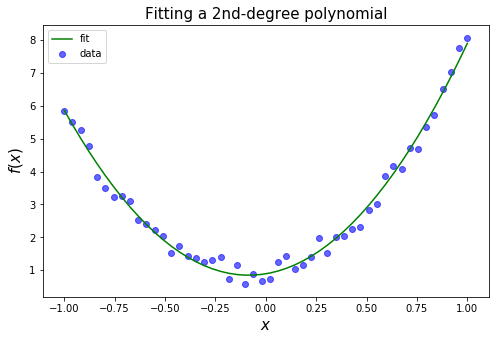

In [12]:
# your code here
title = 'Fitting a 2nd-degree polynomial'
fit_and_plot_func(poly2, x_1, y_1, title)

### Functions with variable number of arguments.

Hardcoding the definitions of the polynomials for the 2nd and 4th degree polynomials was not so bad. What if, though, we wanted to define a function for creating a 6th, or 7th, or 10th degree polynomial? We would have to write a separate function for each one. **Why?**

A $n$th degree polynomial is described by the formula:
$$ {\rm P_n(x)} = \sum_{k=0}^n a_k\cdot{x^k}
$$
Where $a_n$ are the coefficients.<br>

```python    
    def poly(x:np.array, *coeffs):
        """Define a polynomial of variable degree. 
           Arguments: 
           x = array of data points, 
           *coeffs = ordered set of coefficients corresponding to polynomial exponents 
                     in order of descending powers
           Returns: an array of the number values of the polynomial on the data points
        """
  
       p = np.zeros(len(x))    # equivalently, you can write: p=0
    
       # we reverse the coeff array to match the expression of the polynomial 
       # a*x^n + b*x^(n-1) + ...
       coeffs = <reverse_the_array>
        
       #loop though the arguments
       for i, value in enumerate(coeffs): 
           p = <do_something>
       
       return p
```

#### First some useful piece of code: how to iterate through an array

In [13]:
# our array
coeffs = [2.,0.5,7.,3.]
for i, value in enumerate(coeffs):
    print(f'{i}, value={value}')

0, value=2.0
1, value=0.5
2, value=7.0
3, value=3.0


#### How to reverse an array and why you might need to do this.

We are doing this to match the coefficients's **index** in the `coeff` array with the **exponent** to which their respective variable is raised in the polynomial. 
<BR>
So, if we have the following polynomial:
<BR>
$$ {\rm P(x)} = a\cdot{x^2}+b\cdot{x}+c
$$ 
<BR>
and the following coefficient array: `coeff` = array[a, b, c]<BR><BR>
`coeff[0]` = $a$ so $a$'s **index**=$0$, BUT $a$'s **exponent**=$2$ because we have $a\cdot{x^2}$<BR><BR>
If `coeff` = array[c, a, b] then the indexes match the exponents.
    
There are multiple ways to write the `poly` function and you might find one that does not require you to reverse the array. It's fine as long as it gives us the right result! <BR><BR>
In the example below, $a=2., b=0.5, c=7.0, d=3.$

In [14]:
coeffs = [2.,0.5,7.,3.]
print(f'array before reversing:{coeffs}')
coeffs = coeffs[::-1]
print(f'array after reversing:{coeffs}')

array before reversing:[2.0, 0.5, 7.0, 3.0]
array after reversing:[3.0, 7.0, 0.5, 2.0]


*For more on functions read the [scipy notes](https://scipy-lectures.org/intro/language/functions.html)*.

>**EXERCISE 2**: 
- Write the Python function `poly()`, defined above, for an arbitrary polynomial, with arguments 1) x=the datapoints and 2) the coefficients. 
- Then, create a function named `poly2()` that uses `poly()` to create a 2nd degree polynomial. 
- Finally, plot the 2nd degree polynomial.

In [21]:
# your code here

def poly(x:np.array, *coeffs):
    """Defines a polynomial of variable degree. 
       Arguments: x = array of data points, 
       *coeffs = ordered set of coefficients corresponding to polynomial exponents 
                 in order of descending powers
       Returns: an array of the number values of the polynomial on the data points
    """
    p = np.zeros(len(x))    # equivalently, you can write: p=0

    # we reverse the coeff array to match the expression of the polynomial 
    # a*x^n + b*x^(n-1) + ...
    coeffs = coeffs[::-1] # <reverse_the_array> *args is already an array

    #loop though the arguments
    for i, value in enumerate(coeffs):
        p += (x**i) * coeffs[i] 

    return p

In [22]:
# Define the 2nd degree using the generic function
def poly2(x,a,b,c):
    return poly(x,a,b,c)

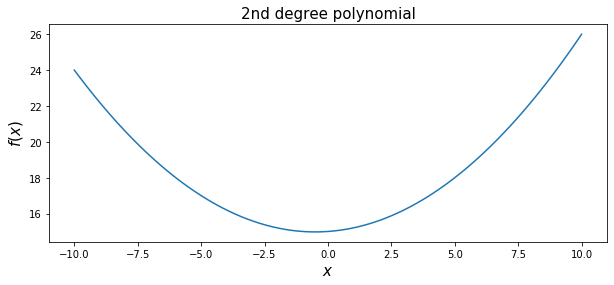

In [23]:
x = np.linspace(-10,10, 100)
y = poly2(x, a, b, c)
a, b, c = 0.1, 0.1, 15.
fig = plt.figure(figsize=(10,4))
plt.xlabel(r'$x$', fontsize=fonts)
plt.ylabel(r'$f(x)$', fontsize=fonts)
plt.title('2nd degree polynomial', fontsize=fonts)
plt.plot(x, y);
plt.show();

## 2. Fitting our second set of data points

### First we will try with polynomials

- Let's import the set of (x, y) points by loading the following two data files: `data/AM10_L11_2_x.txt` and `data/AM10_L11_2_y.txt` in variables `x_2` and `y_2` respectively.
- Again, check to see if what you see is what you get. Save the array dimension in a variable named `Nd_2` for later use.
- Lastly let's plot the two arrays. 

In [25]:
x_2=np.loadtxt('AM10_L11_2_x.txt')
y_2=np.loadtxt('AM10_L11_2_y.txt')

50 50


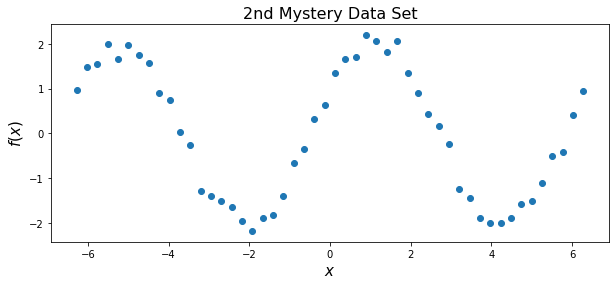

In [26]:
print(len(x_2), len(y_2))
Nd_2 = len(x_2)
    
# Plot
fonts = 15
fig = plt.figure(figsize=(10,4))
plt.xlabel(r'$x$', fontsize=fonts)
plt.ylabel(r'$f(x)$', fontsize=fonts)
plt.title(f'2nd Mystery Data Set', fontsize=fonts+1)
plt.scatter(x_2, y_2, label='data');
plt.show();

### PROBLEM 1: 
Combine the `fit_and_plot_func()` with the custom polynomial function `poly` to try and fit various degree polynomials to the data above. Start with a 4th degree and go higher, as needed.<BR><BR>
**Hint:** Define 
```
def poly4(x,a,b,c,d,e):
    return poly(x,a,b,c,d,e)
```

In [29]:
# define 10th-degree polynomial

def poly10(x,a,b,c,d,e,f,g,h,i,j):
    return poly(x,a,b,c,d,e,f,g,h,i,j)

num of variables=10
RMSE=[0.14925737]


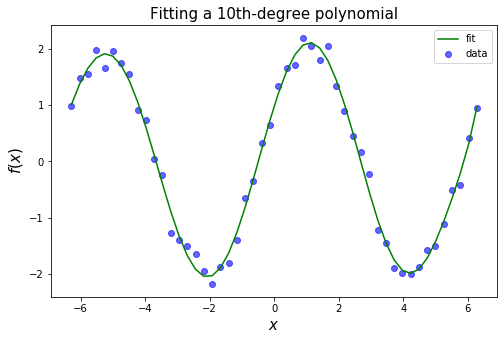

In [30]:
# curve-fit
title = 'Fitting a 10th-degree polynomial'
fit_and_plot_func(poly10, x_2, y_2, title)

### Let's try with a sin() 

On second thought, this plot looks more like a sin() function than a polynomial. Try to guess the $A$, $\omega$, and $\phi$ parameters in the following formula:<BR><BR>
$$ {\rm P(x)} = A+B * \cos(\omega * x + \phi) 
$$ 
>**EXERCISE 4**: 
1. Use `curve_fit` to fit the coefficients and plot the sinusoidal function above.

In [31]:
# define sin_func
def sinuisoidal_func(x, a, b, omega, phi):
    return a + b * np.cos((omega * x) + phi)


num of variables=4
RMSE=[0.15960813]


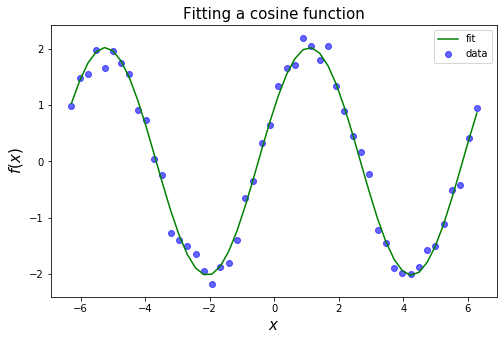

In [32]:
# curve-fit
title = 'Fitting a cosine function'
fit_and_plot_func(sinuisoidal_func, x_2, y_2, title)

## 3. Our Third Set of Data Points

### PROBLEM 2: 
1. Import the set of (x, y) points by loading the following two data files: `AM10_L11_3_x.txt` and `AM10_L11_3_y.txt` in variables $x3$ and $y3$ respectively.
2. Look up $x$ and $y$ array shape, check if their dimension is the same, and if so, save that dimension in variable Nd for later use.
3. Plot the two arrays and describe what you see. 
4. Fit an approximate function and plot them using `curve_fit`

In [33]:
# load data
x_3 = np.loadtxt('AM10_L11_3_x.txt')
y_3 = np.loadtxt('AM10_L11_3_y.txt')

100 100


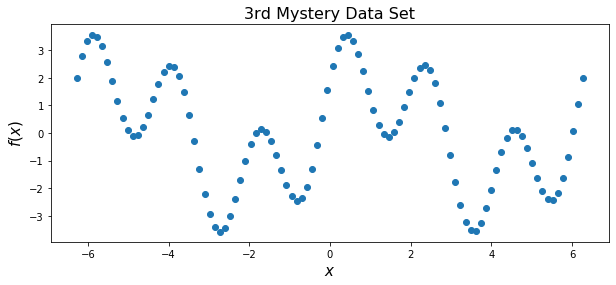

In [35]:
# plot data
print(len(x_3), len(y_3))
if len(x_3) == len(y_3):
    Nd_3 = len(x_3)
    
# Plot
fonts = 15
fig = plt.figure(figsize=(10,4))
plt.xlabel(r'$x$', fontsize=fonts)
plt.ylabel(r'$f(x)$', fontsize=fonts)
plt.title(f'3rd Mystery Data Set', fontsize=fonts+1)
plt.scatter(x_3, y_3, label='data');
plt.show();

In [36]:
# define 10th-degree polynomial
def poly10(x,a,b,c,d,e,f,g,h,i,j):
    return poly(x,a,b,c,d,e,f,g,h,i,j)

In [42]:
# define trig_polynomial (Fourier series)
def fourier_func(x, a1, b1, a2, b2, omega1, omega2, phi1, phi2):
    return (a1 + b1 * np.cos((omega1 * x) + phi1)) + (a2 + b2 * np.cos((omega2 * x) + phi2))

num of variables=4
RMSE=[1.39051135]


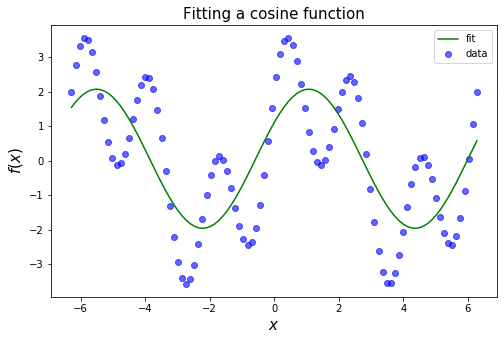

In [39]:
# curve-fit
title = 'Fitting a cosine function'
fit_and_plot_func(sinuisoidal_func, x_3, y_3, title)

num of variables=10
RMSE=[1.28933861]


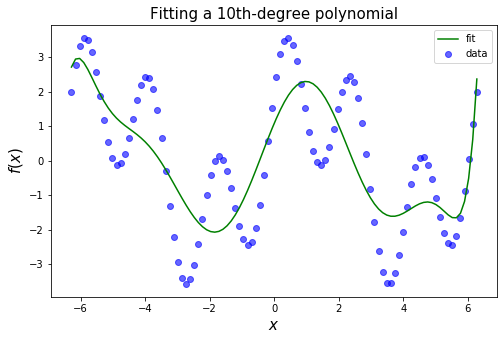

In [41]:
# curve-fit
title = 'Fitting a 10th-degree polynomial'
fit_and_plot_func(poly10, x_3, y_3, title)

num of variables=8
RMSE=[1.37760938]


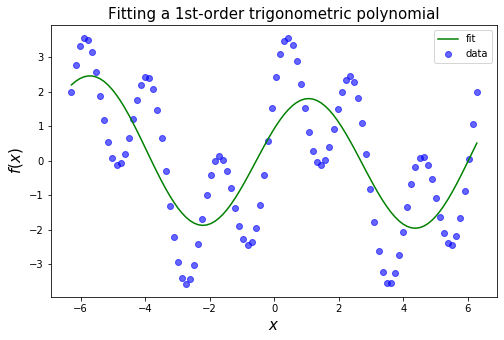

In [43]:
# curve-fit
title = 'Fitting a 1st-order trigonometric polynomial'
fit_and_plot_func(fourier_func, x_3, y_3, title)